In [47]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [48]:
class_names = ['mountain', 'forest', 'buildings']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb = len(class_names)

print(class_names_label)

size = (150,150)

{'mountain': 0, 'forest': 1, 'buildings': 2}


In [49]:
def load_data():
    directory = r"C:\Users\mreli\IA"
    category = ["seg_train", "seg_test"]
    
    output =[]
    
    for categ in category:
        path = os.path.join(directory, categ)
        print(path)
        images = []
        labels = []
        
        print("loading".format(category))
        
        for folder in os.listdir(path):
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(path, folder)):
                img_path = os.path.join(os.path.join(path, folder), file)
                
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, size)
                
                images.append(image)
                labels.append(label)
        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))
        
    return output

In [50]:
(train_images, train_labels), (test_images, test_labels) = load_data()

C:\Users\mreli\IA\seg_train
loading
C:\Users\mreli\IA\seg_test
loading


In [51]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

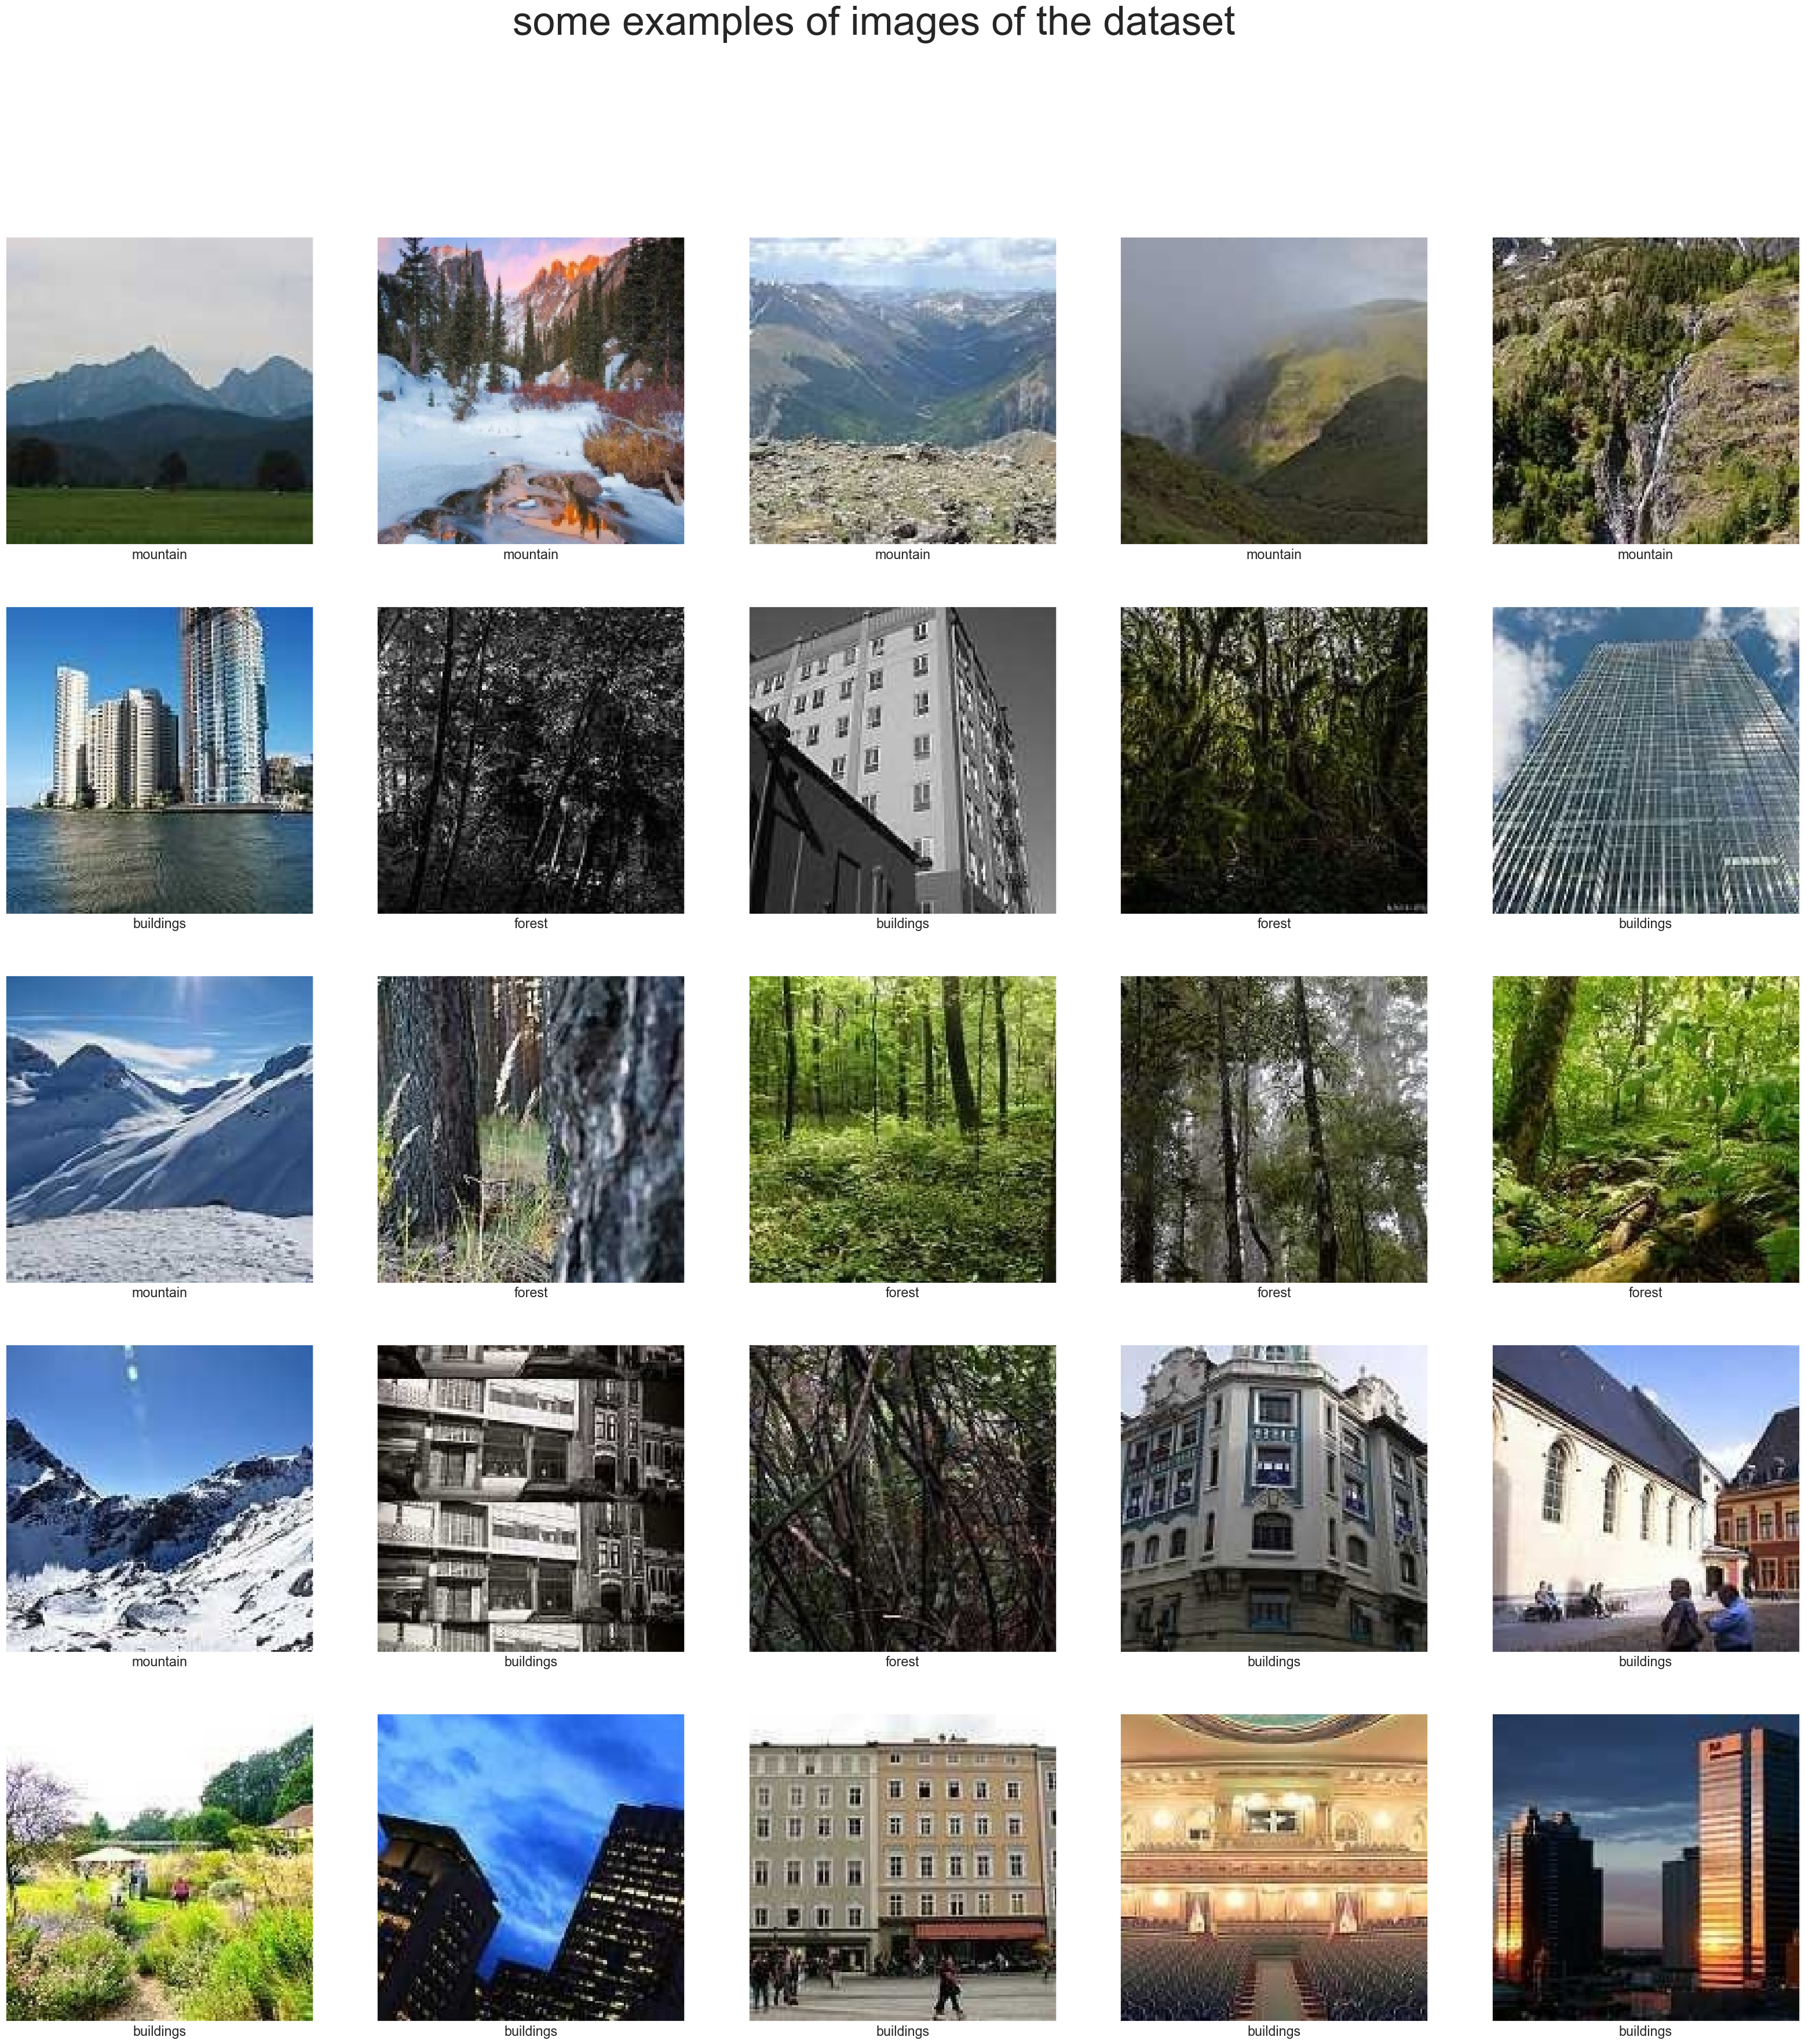

In [52]:
def display_examples(class_names, images, labels):
    figsize = (40,40)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("some examples of images of the dataset", fontsize=50)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #image = cv2.resize(images[i], figsize)
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show
display_examples(class_names, train_images, train_labels)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=4, validation_split=0.2)

Epoch 1/4
34/34 [==============================] - 55s 2s/step - loss: 100.8030 - accuracy: 0.5578 - val_loss: 0.8952 - val_accuracy: 0.7316
Epoch 2/4
34/34 [==============================] - 55s 2s/step - loss: 0.6200 - accuracy: 0.8213 - val_loss: 0.7158 - val_accuracy: 0.7853
Epoch 3/4
34/34 [==============================] - 56s 2s/step - loss: 0.2893 - accuracy: 0.9228 - val_loss: 0.7428 - val_accuracy: 0.8107
Epoch 4/4
34/34 [==============================] - 52s 2s/step - loss: 0.1371 - accuracy: 0.9689 - val_loss: 0.9250 - val_accuracy: 0.8023


In [56]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = 'acc')
    plt.plot(history.history['val_accuracy'],'ro--', label = 'val_acc')
    plt.title('train_acc vs val_acc')
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = 'loss')
    plt.plot(history.history['val_loss'],'ro--', label = 'val_loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel("loss")
    plt.xlabel("epochs")
    
    plt.legend()
    plt.show()

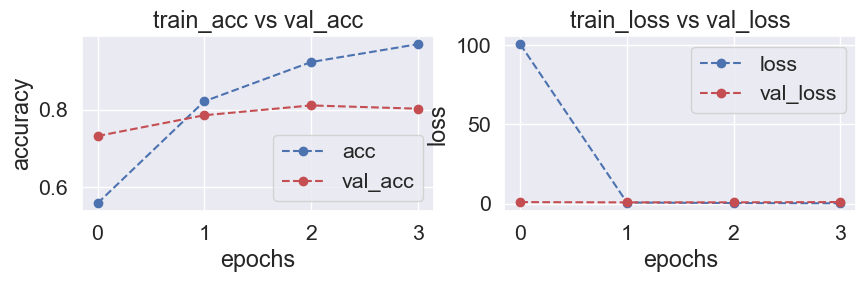

In [57]:
plot_accuracy_loss(history)

In [58]:
test_loss = model.evaluate(test_images, test_labels)

81/81 [==============================] - 7s 84ms/step - loss: 0.8598 - accuracy: 0.7998


In [59]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions,  axis=1)
print(classification_report(test_labels, pred_labels))

81/81 [==============================] - 8s 93ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1092
           1       0.93      0.80      0.86       771
           2       0.65      0.76      0.70       720

    accuracy                           0.80      2583
   macro avg       0.81      0.80      0.80      2583
weighted avg       0.81      0.80      0.80      2583

